In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs=4

In [4]:
path = '/home/spriyanshu723/biomedical/Mask_with_2class/'

In [5]:
data = (ImageList.from_folder(path).split_by_rand_pct().label_from_folder().databunch(bs=bs))
data

ImageDataBunch;

Train: LabelList (5216 items)
x: ImageList
Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500)
y: CategoryList
Benign,Benign,Benign,Benign,Benign
Path: /home/spriyanshu723/biomedical/Mask_with_2class;

Valid: LabelList (1304 items)
x: ImageList
Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500)
y: CategoryList
Benign,Benign,Benign,Malignant,Malignant
Path: /home/spriyanshu723/biomedical/Mask_with_2class;

Test: None

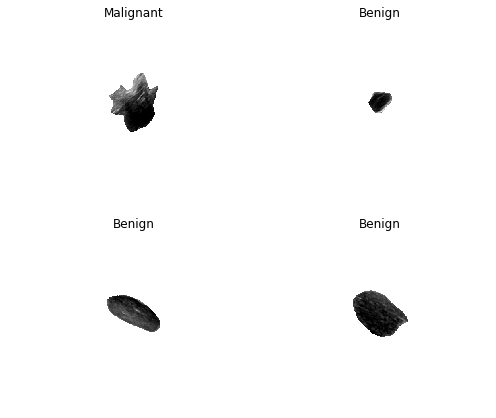

In [6]:
data.show_batch(rows=3, figsize=(7,6))

In [7]:
data.classes

['Benign', 'Malignant']

## TRAINING 

In [8]:
learn = cnn_learner(data, models.alexnet , metrics=error_rate)

In [9]:
learn.model

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
      (1): ReLU(inplace)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): ReLU(inplace)
      (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU(inplace)
      (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): ReLU(inplace)
      (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace)
      (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): AdaptiveAvgPool2d(output_size=(6, 6))
  )
  (1): Sequential(
    (0): AdaptiveConcatPool2d(
      (ap): AdaptiveAvgPool2d(output_size=1)
      (mp): Adapt

In [10]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


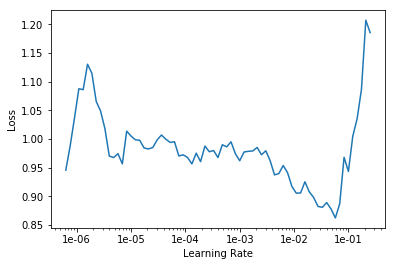

In [11]:
learn.recorder.plot()

In [12]:
learn.fit_one_cycle(2, max_lr=1e-1)

epoch,train_loss,valid_loss,error_rate,time
0,5.744426,186.558395,0.198620,00:15
1,0.491455,20.277521,0.210123,00:16


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


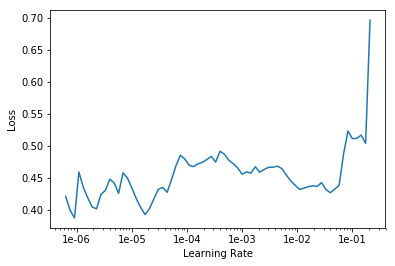

In [13]:
learn.lr_find()
learn.recorder.plot()

In [14]:
learn.save('class_alexnet_1')

In [15]:
learn.fit_one_cycle(4, max_lr=1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,0.545543,23.614616,0.201687,00:16
1,0.453311,9.271646,0.186350,00:16
2,0.434605,15.366355,0.167945,00:16
3,0.406717,11.439350,0.189417,00:16


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


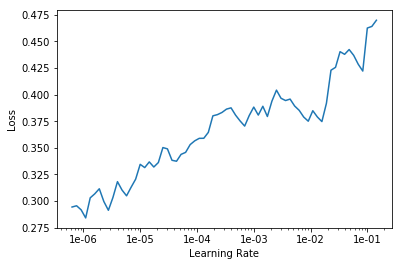

In [17]:
learn.lr_find()
learn.recorder.plot()

In [18]:
learn.save('class_alexnet_2')

In [19]:
learn.fit_one_cycle(2, max_lr=1e-6)

epoch,train_loss,valid_loss,error_rate,time
0,0.498953,8.351990,0.174847,00:16
1,0.488361,2.588224,0.158742,00:16


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


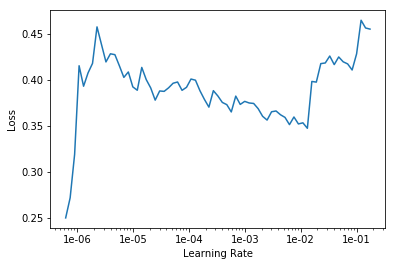

In [20]:
learn.lr_find()
learn.recorder.plot()

In [21]:
learn.save('class_alexnet_3')

In [22]:
learn.fit_one_cycle(5, max_lr=1e-6)

epoch,train_loss,valid_loss,error_rate,time
0,0.405813,3.019959,0.149540,00:15
1,0.474109,9.963181,0.197086,00:16
2,0.431166,11.239043,0.184049,00:16
3,0.414112,6.464587,0.163344,00:16
4,0.469891,8.962257,0.180215,00:16


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


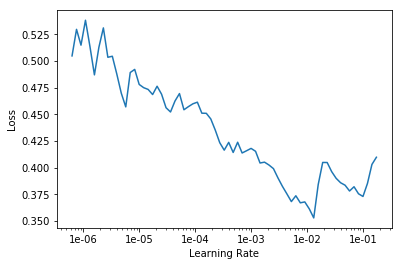

In [23]:
learn.lr_find()
learn.recorder.plot()

In [24]:
learn.save('class_alexnet_4')

In [25]:
learn.load('class_alexnet_2')

Learner(data=ImageDataBunch;

Train: LabelList (5216 items)
x: ImageList
Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500)
y: CategoryList
Benign,Benign,Benign,Benign,Benign
Path: /home/spriyanshu723/biomedical/Mask_with_2class;

Valid: LabelList (1304 items)
x: ImageList
Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500),Image (3, 400, 500)
y: CategoryList
Benign,Benign,Malignant,Malignant,Benign
Path: /home/spriyanshu723/biomedical/Mask_with_2class;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
      (1): ReLU(inplace)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): ReLU(inplace)
      (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2

In [26]:
learn.fit_one_cycle(2, max_lr=1e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.406261,10.399391,0.171779,00:16
1,0.437736,12.911766,0.158742,00:16


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


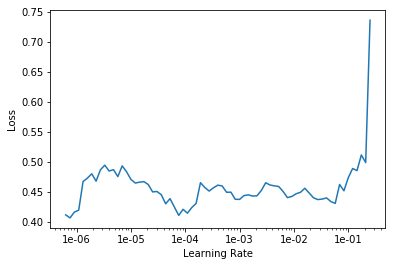

In [27]:
learn.lr_find()
learn.recorder.plot()

In [28]:
learn.save('class_alexnet_5')

In [29]:
learn.fit_one_cycle(2, max_lr=1e-6)

epoch,train_loss,valid_loss,error_rate,time
0,0.409476,5.994753,0.158742,00:16
1,0.456068,7.591789,0.183282,00:16


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


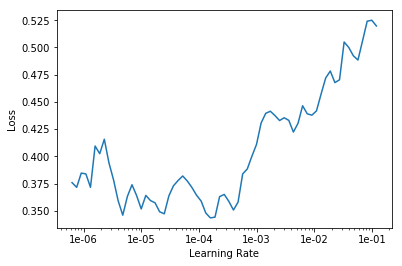

In [30]:
learn.lr_find()
learn.recorder.plot()

In [31]:
learn.save('class_alexnet_6')

In [32]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


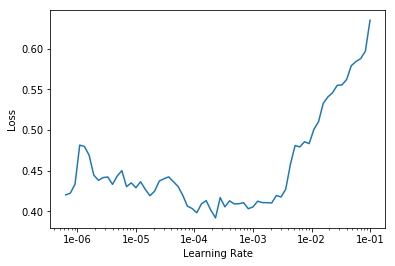

In [33]:
learn.lr_find()
learn.recorder.plot()

In [34]:
learn.fit_one_cycle(2, max_lr=1e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.511869,4.228159,0.200153,00:19
1,0.410805,24.173651,0.180215,00:19


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


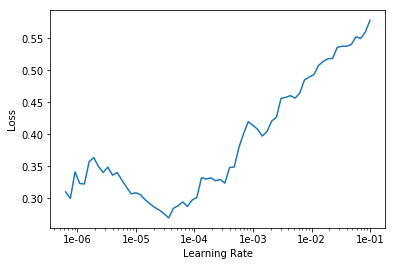

In [35]:
learn.lr_find()
learn.recorder.plot()

In [36]:
learn.save('class_alexnet_7')

In [37]:
learn.fit_one_cycle(2, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.391280,1.203101,0.151074,00:20
1,0.371184,14.005726,0.134969,00:19


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


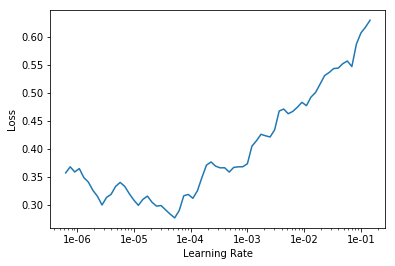

In [38]:
learn.lr_find()
learn.recorder.plot()

In [39]:
learn.save('class_alexnet_8')

In [40]:
learn.fit_one_cycle(2, max_lr=1e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.425942,6.930303,0.197853,00:19
1,0.493130,5.372697,0.128834,00:19


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


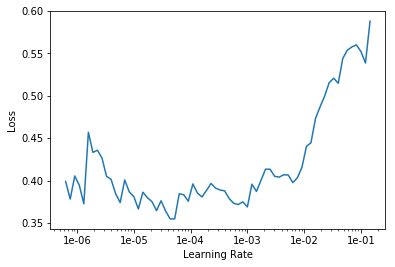

In [41]:
learn.lr_find()
learn.recorder.plot()

In [42]:
learn.save('class_alexnet_9')

In [43]:
learn.fit_one_cycle(8, max_lr=7e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.343607,3.120337,0.129601,00:19
1,0.397327,16.675343,0.136503,00:19
2,0.347687,10.191764,0.118098,00:19
3,0.357270,29.317707,0.116564,00:19
4,0.302053,18.359596,0.125767,00:19
5,0.335962,8.383327,0.077454,00:19
6,0.242723,3.040584,0.092791,00:20
7,0.247684,4.309177,0.058282,00:19


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


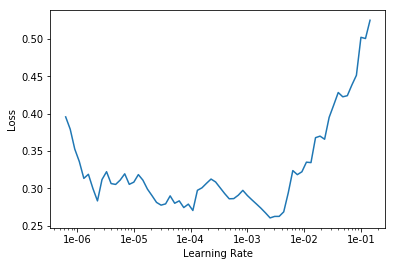

In [44]:
learn.lr_find()
learn.recorder.plot()

In [45]:
learn.save('class_alexnet_10')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


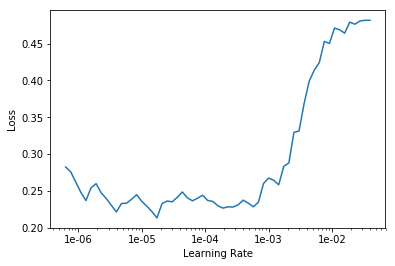

In [46]:
learn.lr_find()
learn.recorder.plot()

In [47]:
learn.fit_one_cycle(8, max_lr=3e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.257095,3.884616,0.081288,00:19
1,0.297208,6.980588,0.078221,00:19
2,0.252302,20.158234,0.057515,00:19
3,0.210267,3.845607,0.069785,00:19
4,0.220370,10.707477,0.065951,00:19
5,0.183175,2.358444,0.055982,00:19
6,0.304169,14.156476,0.085123,00:19
7,0.199879,22.504093,0.080521,00:19


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


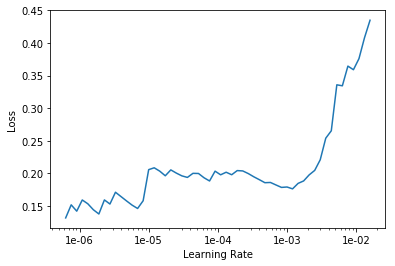

In [48]:
learn.lr_find()
learn.recorder.plot()

In [49]:
learn.save('class_alexnet_11')

In [50]:
learn.fit_one_cycle(8, max_lr=1e-6)

epoch,train_loss,valid_loss,error_rate,time
0,0.208905,34.509819,0.074386,00:19
1,0.199979,13.903444,0.090491,00:19
2,0.183387,11.819610,0.068252,00:19
3,0.189803,16.070412,0.052147,00:19
4,0.180522,43.754765,0.065184,00:19
5,0.174262,26.125534,0.099693,00:19
6,0.222621,24.414480,0.078988,00:19
7,0.279513,30.164272,0.062883,00:19


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


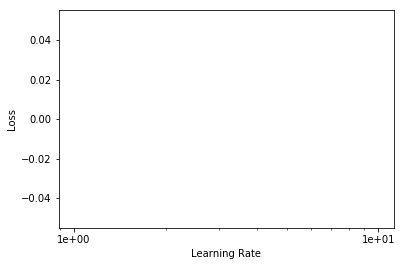

In [53]:
learn.lr_find()
learn.recorder.plot()

In [54]:
learn.save('class_alexnet_12')

In [10]:
learn.load('class_alexnet_10')
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


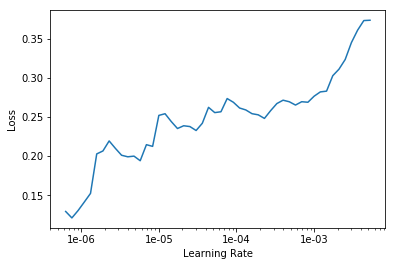

In [11]:
learn.lr_find()
learn.recorder.plot()

In [12]:
learn.fit_one_cycle(8, max_lr=3e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.236092,13.058743,0.059049,00:20
1,0.282264,13.835211,0.078988,00:19
2,0.318446,7.648449,0.083589,00:19
3,0.243954,2.465309,0.062883,00:19
4,0.287542,5.369567,0.038344,00:20
5,0.203893,2.443878,0.052147,00:20
6,0.214018,4.459201,0.033742,00:19
7,0.179416,4.383960,0.033742,00:19


In [13]:
learn.save('class_alexnet_13')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


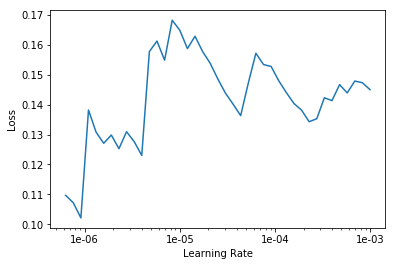

In [14]:
learn.lr_find()
learn.recorder.plot()

## Result 

In [15]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

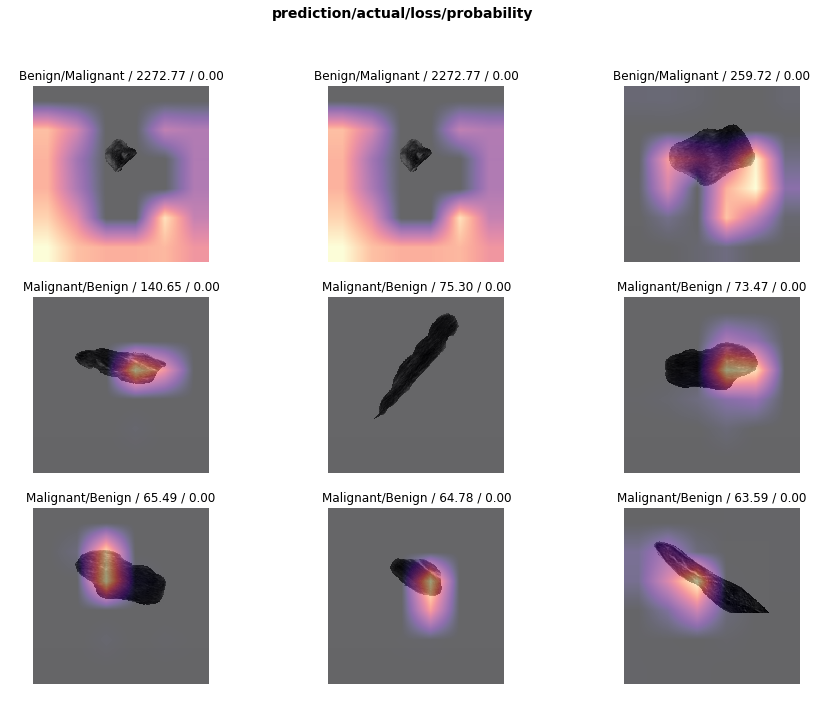

In [16]:
interp.plot_top_losses(9, figsize=(15,11))

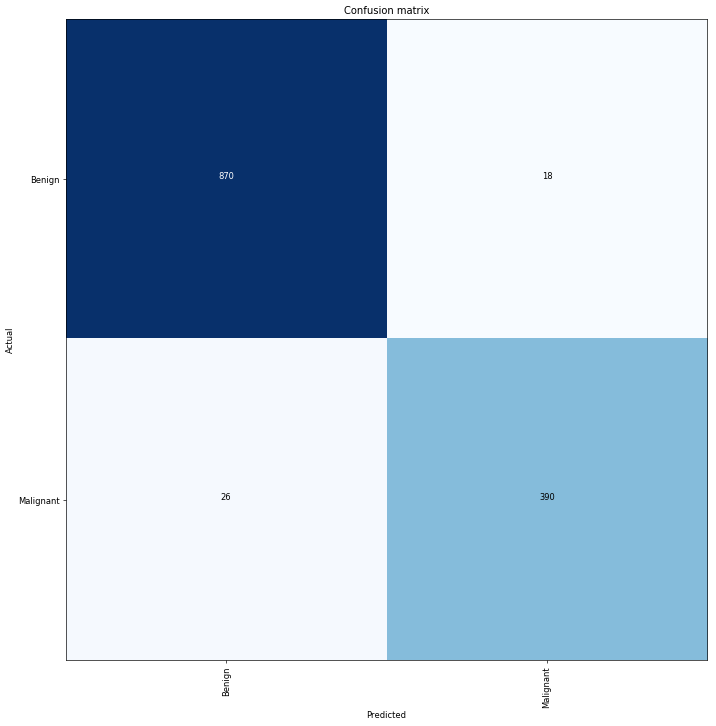

In [17]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)